# Generalized Linear Models

This notebook introduces the algorithms within [Dask-GLM](https://github.com/dask/dask-glm) for [Generalized Linear Models](https://en.wikipedia.org/wiki/Generalized_linear_model).

## Start Dask Client for Dashboard

Starting the Dask Client is optional.  It will provide a dashboard which 
is useful to gain insight on the computation.  

The link to the dashboard will become visible when you create the client below.  We recommend having it open on one side of your screen while using your notebook on the other side.  This can take some effort to arrange your windows, but seeing them both at the same is very useful when learning.

In [1]:
from dask.distributed import Client, progress
client = Client(processes=False, threads_per_worker=4,
                n_workers=1, memory_limit='2GB')
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://192.168.176.2:8787/status,
Dashboard: http://192.168.176.2:8787/status,Workers: 1
Total threads: 4,Total memory: 1.86 GiB
Status: running,Using processes: False
Comm: inproc://192.168.176.2/633/1,Workers: 1
Dashboard: http://192.168.176.2:8787/status,Total threads: 4
Started: Just now,Total memory: 1.86 GiB
Comm: inproc://192.168.176.2/633/4,Total threads: 4
Dashboard: http://192.168.176.2:43001/status,Memory: 1.86 GiB
Nanny: None,


In [8]:
! wget -qO - http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz | gunzip -c > mnist-training-images
! wget -qO - http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz | gunzip -c > mnist-training-labels
! wget -qO - http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz  | gunzip -c > mnist-test-images
! wget -qO - http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz  | gunzip -c > mnist-test-labels

In [56]:
from idx2numpy import convert_from_file
import dask.array as da

tr_img = da.from_array(convert_from_file('mnist-training-images').reshape((60000, 784)), chunks=(3000, 784))
tr_lab = da.from_array(convert_from_file('mnist-training-labels'), chunks=(3000))
ts_img = da.from_array(convert_from_file('mnist-test-images').reshape((10000, 784)), chunks=(1000, 784))
ts_lab = da.from_array(convert_from_file('mnist-test-labels'), chunks=(1000))

In [57]:
tr_img

dask.array<array, shape=(60000, 784), dtype=uint8, chunksize=(3000, 784), chunktype=numpy.ndarray>

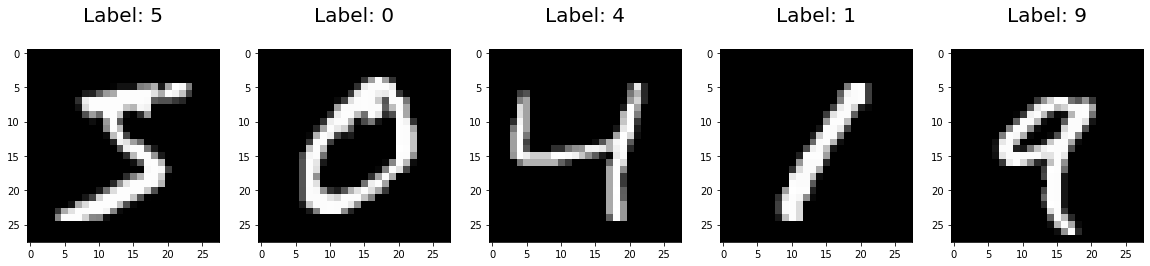

In [59]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(tr_img[0:5], tr_lab[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(da.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Label: %i\n' % label, fontsize = 20)

## Make a random dataset

In [60]:
import dask
X, y = dask.persist(tr_img, tr_lab)

In [79]:
from dask_ml.linear_model import LogisticRegression
# from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(solver='lbfgs', solver_kwargs={"normalize":False})
logisticRegr.fit(X, y)

/opt/conda/lib/python3.8/site-packages/dask/config.py:643: UserWarning: Configuration key "fuse_ave_width" has been deprecated. Please use "optimization.fuse.ave-width" instead
  warnings.warn(
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 1.33 GiB -- Worker memory limit: 1.86 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 1.35 GiB -- Worker memory limit: 1.86 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanage

LogisticRegression(solver='lbfgs', solver_kwargs={'normalize': False})

distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 1.34 GiB -- Worker memory limit: 1.86 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 1.34 GiB -- Worker memory limit: 1.86 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 1.34 GiB -- Worker memory limit: 1.86 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see 

In [ ]:
# Make predictions on entire test data
predictions = logisticRegr.predict(ts_img)

distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 1.34 GiB -- Worker memory limit: 1.86 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 1.34 GiB -- Worker memory limit: 1.86 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 1.34 GiB -- Worker memory limit: 1.86 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see 

In [81]:
score = logisticRegr.score(ts_img, ts_lab)
print(score.compute())

distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 1.34 GiB -- Worker memory limit: 1.86 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 1.34 GiB -- Worker memory limit: 1.86 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 1.34 GiB -- Worker memory limit: 1.86 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see 

0.1135


distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 1.34 GiB -- Worker memory limit: 1.86 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 1.34 GiB -- Worker memory limit: 1.86 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 1.34 GiB -- Worker memory limit: 1.86 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see 

In [75]:
print(ts_img.compute().shape)

(10000, 784)


In [ ]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(ts_lab, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 1.31 GiB -- Worker memory limit: 1.86 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 1.31 GiB -- Worker memory limit: 1.86 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 1.31 GiB -- Worker memory limit: 1.86 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see 

In [ ]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(da.reshape(ts_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], ts_lab[badIndex]), fontsize = 15)

## Solve with a GLM algorithm

*We also recommend looking at the "Graph" dashboard during execution if available*

In [12]:
import dask_glm.algorithms

b = dask_glm.algorithms.admm(X, y, max_iter=5)

## Solve with a difference GLM algorithm

In [13]:
b = dask_glm.algorithms.proximal_grad(X, y, max_iter=5)

/opt/conda/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))


## Customizable with different families and regularizers

The Dask-GLM project is nicely modular, allowing for different GLM families and regularizers, including a relatively straightforward interface for implementing custom ones.

In [14]:
import dask_glm.families
import dask_glm.regularizers

family = dask_glm.families.Poisson()
regularizer = dask_glm.regularizers.ElasticNet()

b = dask_glm.algorithms.proximal_grad(
    X, y, 
    max_iter=5, 
    family=family,
    regularizer=regularizer,
)

/opt/conda/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))
/opt/conda/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))


In [15]:
dask_glm.families.Poisson??

Init signature: dask_glm.families.Poisson()
Source:        
class Poisson(object):
    """
    This implements `Poisson regression`_

    Useful for modelling count data.

    .. _Poisson regression: https://en.wikipedia.org/wiki/Poisson_regression
    """
    @staticmethod
    def loglike(Xbeta, y):
        eXbeta = exp(Xbeta)
        yXbeta = y * Xbeta
        return (eXbeta - yXbeta).sum()

    @staticmethod
    def pointwise_loss(beta, X, y):
        beta, y = beta.ravel(), y.ravel()
        Xbeta = X.dot(beta)
        return Poisson.loglike(Xbeta, y)

    @staticmethod
    def pointwise_gradient(beta, X, y):
        beta, y = beta.ravel(), y.ravel()
        Xbeta = X.dot(beta)
        return Poisson.gradient(Xbeta, X, y)

    @staticmethod
    def gradient(Xbeta, X, y):
        eXbeta = exp(Xbeta)
        return dot(X.T, eXbeta - y)

    @staticmethod
    def hessian(Xbeta, X):
        eXbeta = exp(Xbeta)
        x_diag_eXbeta = eXbeta[:, None] * X
        return dot(X.T, x_diag_e

In [16]:
dask_glm.regularizers.ElasticNet??

Init signature: dask_glm.regularizers.ElasticNet(weight=0.5)
Source:        
class ElasticNet(Regularizer):
    """Elastic net regularization."""
    name = 'elastic_net'

    def __init__(self, weight=0.5):
        self.weight = weight
        self.l1 = L1()
        self.l2 = L2()

    def _weighted(self, left, right):
        return self.weight * left + (1 - self.weight) * right

    def f(self, beta):
        return self._weighted(self.l1.f(beta), self.l2.f(beta))

    def gradient(self, beta):
        return self._weighted(self.l1.gradient(beta), self.l2.gradient(beta))

    def hessian(self, beta):
        return self._weighted(self.l1.hessian(beta), self.l2.hessian(beta))

    def proximal_operator(self, beta, t):
        """See notebooks/ElasticNetProximalOperatorDerivation.ipynb for derivation."""
        g = self.weight * t

        @np.vectorize
        def func(b):
            if b <= g:
                return 0
            return (b - g * np.sign(b)) / (t - g + 1)
        r